<a href="https://colab.research.google.com/github/Alisson-S-Ribeiro/ProjetoRegress-oT3/blob/main/Projeto_Trilha_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importação das Bibliotecas Necessárias.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

#Carregando Dados

In [ ]:
data = pd.read_csv('top_insta_influencers_data.csv')
data

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,iambeckyg,71,2.3k,33.2m,623.8k,1.40%,464.7k,1.4b,United States
196,197,nancyajram,81,3.8k,33.2m,390.4k,0.64%,208.0k,1.5b,France
197,198,luansantana,79,0.77k,33.2m,193.3k,0.26%,82.6k,149.2m,Brazil
198,199,nickjonas,78,2.3k,33.0m,719.6k,1.42%,467.7k,1.7b,United States


In [ ]:
data.head (30)

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States
5,6,kimkardashian,91,5.6k,329.2m,3.5m,0.88%,2.9m,19.9b,United States
6,7,arianagrande,92,5.0k,327.7m,3.7m,1.20%,3.9m,18.4b,United States
7,8,beyonce,92,2.0k,272.8m,3.6m,0.76%,2.0m,7.4b,United States
8,9,khloekardashian,89,4.1k,268.3m,2.4m,0.35%,926.9k,9.8b,United States
9,10,justinbieber,91,7.4k,254.5m,1.9m,0.59%,1.5m,13.9b,Canada


In [ ]:
data.tail(10)

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
190,191,bmw,79,9.3k,33.7m,231.3k,0.23%,76.5k,2.2b,Germany
191,192,danbilzerian,84,1.4k,33.6m,2.0m,3.58%,1.2m,2.8b,Canada
192,193,khabib_nurmagomedov,63,4.5k,33.5m,685.1k,0.67%,220.7k,3.1b,Russia
193,194,zidane,41,0.37k,33.5m,1.1m,1.61%,532.7k,391.9m,France
194,195,sonamkapoor,75,4.8k,33.3m,264.7k,0.63%,209.2k,1.3b,India
195,196,iambeckyg,71,2.3k,33.2m,623.8k,1.40%,464.7k,1.4b,United States
196,197,nancyajram,81,3.8k,33.2m,390.4k,0.64%,208.0k,1.5b,France
197,198,luansantana,79,0.77k,33.2m,193.3k,0.26%,82.6k,149.2m,Brazil
198,199,nickjonas,78,2.3k,33.0m,719.6k,1.42%,467.7k,1.7b,United States
199,200,raisa6690,80,4.2k,32.8m,232.2k,0.30%,97.4k,969.1m,Indonesia


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               200 non-null    int64 
 1   channel_info       200 non-null    object
 2   influence_score    200 non-null    int64 
 3   posts              200 non-null    object
 4   followers          200 non-null    object
 5   avg_likes          200 non-null    object
 6   60_day_eng_rate    200 non-null    object
 7   new_post_avg_like  200 non-null    object
 8   total_likes        200 non-null    object
 9   country            138 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.8+ KB


#Transformação de Dados

In [ ]:
data = data.rename(columns={
    'rank': 'classificacao',
    'channel_info': 'user',
    'influence_score': 'ponto_de_influencia',
    'followers': 'seguidores',
    'avg_likes': 'media_curtidas',
    '60_day_eng_rate': 'eng_60_dias',
    'total_likes': 'total_curtidas',
    'new_post_avg_like': 'curtidas_por_post',
    'country': 'pais',
    'category': 'categoria',
})

In [ ]:
replace = {'b': 'e9', 'm': 'e6', 'k': 'e3', '%': ''}
convert_column = ['total_curtidas', 'posts', 'seguidores', 'media_curtidas', 'eng_60_dias', 'curtidas_por_post']
data[convert_column] = data[convert_column].replace(replace, regex=True).astype(float)
data['total_curtidas'] = data['total_curtidas'].astype('int64')

data[convert_column]

,total_curtidas,posts,seguidores,media_curtidas,eng_60_dias,curtidas_por_post
0,29000000000,3300.0,475800000.0,8700000.0,1.39,6500000.0
1,57400000000,6900.0,366200000.0,8300000.0,1.62,5900000.0
2,6000000000,890.0,357300000.0,6800000.0,1.24,4400000.0
3,11500000000,1800.0,342700000.0,6200000.0,0.97,3300000.0
4,12500000000,6800.0,334100000.0,1900000.0,0.20,665300.0
...,...,...,...,...,...,...
195,1400000000,2300.0,33200000.0,623800.0,1.40,464700.0
196,1500000000,3800.0,33200000.0,390400.0,0.64,208000.0
197,149200000,770.0,33200000.0,193300.0,0.26,82600.0
198,1700000000,2300.0,33000000.0,719600.0,1.42,467700.0


In [ ]:
pais_continentes = {
    'United States': 'North America',
    'Brazil': 'South America',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'France' : 'Europe',
    'Spain' : 'Europe',
    'United Kingdom''': 'Europe',
    'Canada' : 'North America',
    'Colombia' : 'South America',
    'Turkey' : 'Europe',
    'Mexico' : 'North America',
    'Netherlands' : 'Europe',
    'Anguilla' : 'North America',
    'Germany' : 'Europe',
    'Czech Republic' : 'Europe',
    'British Virgin Islands' : 'North America',
    'Sweden' : 'Europe',
    'Switzerland' : 'Europe',
    'Australia' : 'Oceania',
    'CÃ´te dIvoire' : 'Africa',
    'Puerto Rico' : 'North America',
    'United Arab Emirates' : 'Asia',
    'Italy' : 'Europe',
    'Uruguay' : 'South America',
    'Russia': 'Europe',
    'Japan': 'Asia',
    'Mexico': 'North America'
}

In [ ]:
data['continente'] = data['pais'].map(pais_continentes)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   classificacao        200 non-null    int64  
 1   user                 200 non-null    object 
 2   ponto_de_influencia  200 non-null    int64  
 3   posts                200 non-null    float64
 4   seguidores           200 non-null    float64
 5   media_curtidas       200 non-null    float64
 6   eng_60_dias          199 non-null    float64
 7   curtidas_por_post    200 non-null    float64
 8   total_curtidas       200 non-null    int64  
 9   pais                 138 non-null    object 
 10  continente           137 non-null    object 
dtypes: float64(5), int64(3), object(3)
memory usage: 17.3+ KB


In [ ]:
data.head(30)

,classificacao,user,ponto_de_influencia,posts,seguidores,media_curtidas,eng_60_dias,curtidas_por_post,total_curtidas,pais,continente
0,1,cristiano,92,3300.0,475800000.0,8700000.0,1.39,6500000.0,29000000000,Spain,Europe
1,2,kyliejenner,91,6900.0,366200000.0,8300000.0,1.62,5900000.0,57400000000,United States,North America
2,3,leomessi,90,890.0,357300000.0,6800000.0,1.24,4400000.0,6000000000,NaN,NaN
3,4,selenagomez,93,1800.0,342700000.0,6200000.0,0.97,3300000.0,11500000000,United States,North America
4,5,therock,91,6800.0,334100000.0,1900000.0,0.20,665300.0,12500000000,United States,North America
5,6,kimkardashian,91,5600.0,329200000.0,3500000.0,0.88,2900000.0,19900000000,United States,North America
6,7,arianagrande,92,5000.0,327700000.0,3700000.0,1.20,3900000.0,18400000000,United States,North America
7,8,beyonce,92,2000.0,272800000.0,3600000.0,0.76,2000000.0,7400000000,United States,North America
8,9,khloekardashian,89,4100.0,268300000.0,2400000.0,0.35,926900.0,9800000000,United States,North America
9,10,justinbieber,91,7400.0,254500000.0,1900000.0,0.59,1500000.0,13900000000,Canada,North America


In [ ]:
data.tail(10)

,classificacao,user,ponto_de_influencia,posts,seguidores,media_curtidas,eng_60_dias,curtidas_por_post,total_curtidas,pais,continente
190,191,bmw,79,9300.0,33700000.0,231300.0,0.23,76500.0,2200000000,Germany,Europe
191,192,danbilzerian,84,1400.0,33600000.0,2000000.0,3.58,1200000.0,2800000000,Canada,North America
192,193,khabib_nurmagomedov,63,4500.0,33500000.0,685100.0,0.67,220700.0,3100000000,Russia,Europe
193,194,zidane,41,370.0,33500000.0,1100000.0,1.61,532700.0,391900000,France,Europe
194,195,sonamkapoor,75,4800.0,33300000.0,264700.0,0.63,209200.0,1300000000,India,Asia
195,196,iambeckyg,71,2300.0,33200000.0,623800.0,1.40,464700.0,1400000000,United States,North America
196,197,nancyajram,81,3800.0,33200000.0,390400.0,0.64,208000.0,1500000000,France,Europe
197,198,luansantana,79,770.0,33200000.0,193300.0,0.26,82600.0,149200000,Brazil,South America
198,199,nickjonas,78,2300.0,33000000.0,719600.0,1.42,467700.0,1700000000,United States,North America
199,200,raisa6690,80,4200.0,32800000.0,232200.0,0.30,97400.0,969100000,Indonesia,Asia


#Visualizando os Dados

In [ ]:
data[['pais', 'seguidores']]

,pais,seguidores
0,Spain,475800000.0
1,United States,366200000.0
2,NaN,357300000.0
3,United States,342700000.0
4,United States,334100000.0
...,...,...
195,United States,33200000.0
196,France,33200000.0
197,Brazil,33200000.0
198,United States,33000000.0


In [ ]:
seguidores_continente = data.groupby('continente')['seguidores'].sum().reset_index()
print(seguidores_continente)

      continente    seguidores
0           Asia  1.038000e+09
1         Europe  1.758300e+09
2  North America  7.699400e+09
3        Oceania  5.590000e+07
4  South America  9.589000e+08


<ipython-input-231-de8cd0dc8ff7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='continente', y='seguidores', data=seguidores_continente, palette="inferno")


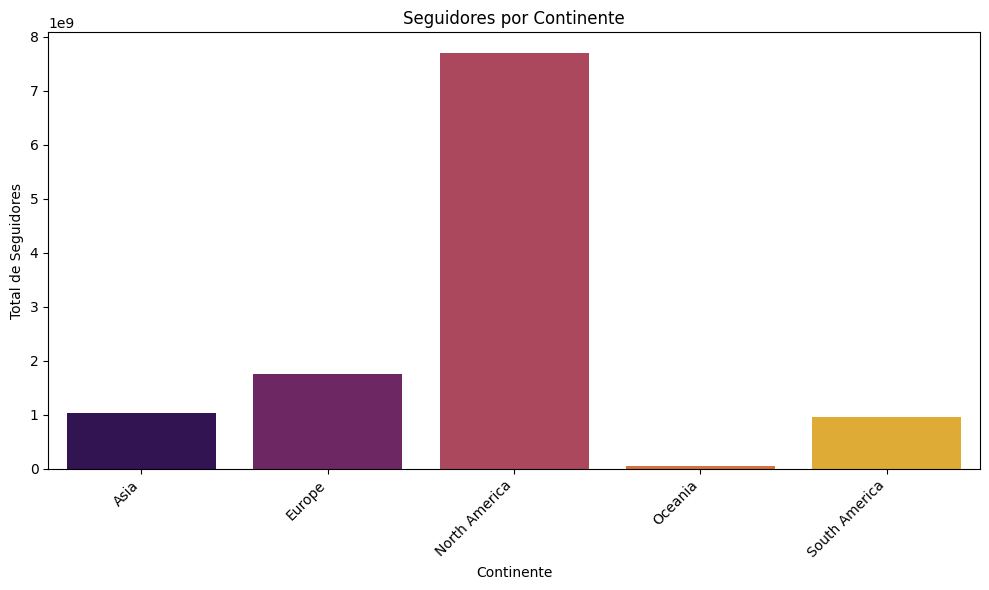

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='continente', y='seguidores', data=seguidores_continente, palette="inferno")
plt.title('Seguidores por Continente')
plt.xlabel('Continente')
plt.ylabel('Total de Seguidores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
curtidas_continente = data.groupby('continente')['total_curtidas'].sum().reset_index()
print(curtidas_continente)

      continente  total_curtidas
0           Asia     48784700000
1         Europe     93215300000
2  North America    383570800000
3        Oceania      2500000000
4  South America     60969300000


<ipython-input-233-df9cba4ced3a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='continente', y='total_curtidas', data=curtidas_continente, palette='inferno')


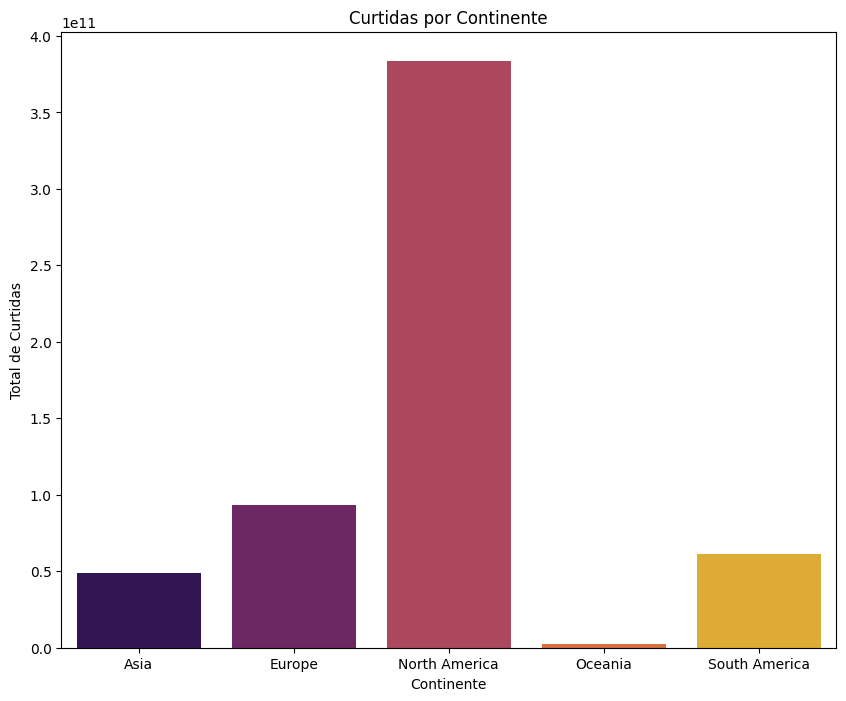

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x='continente', y='total_curtidas', data=curtidas_continente, palette='inferno')
plt.title('Curtidas por Continente')
plt.xlabel('Continente')
plt.ylabel('Total de Curtidas')

plt.show()

In [ ]:
pais_counts = data['pais'].value_counts()
print(pais_counts)

pais
United States             66
Brazil                    13
India                     12
Indonesia                  7
France                     6
Spain                      5
United Kingdom             4
Colombia                   3
Canada                     3
Mexico                     2
Turkey                     2
Netherlands                2
Switzerland                1
Germany                    1
Czech Republic             1
British Virgin Islands     1
Sweden                     1
Australia                  1
Anguilla                   1
CÃ´te d'Ivoire             1
Puerto Rico                1
United Arab Emirates       1
Italy                      1
Uruguay                    1
Russia                     1
Name: count, dtype: int64


In [ ]:
seguidores_pais = data.groupby('pais')['seguidores'].sum().reset_index()

<ipython-input-236-2216c796c728>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='pais', x='seguidores', data=seguidores_pais, palette='inferno')


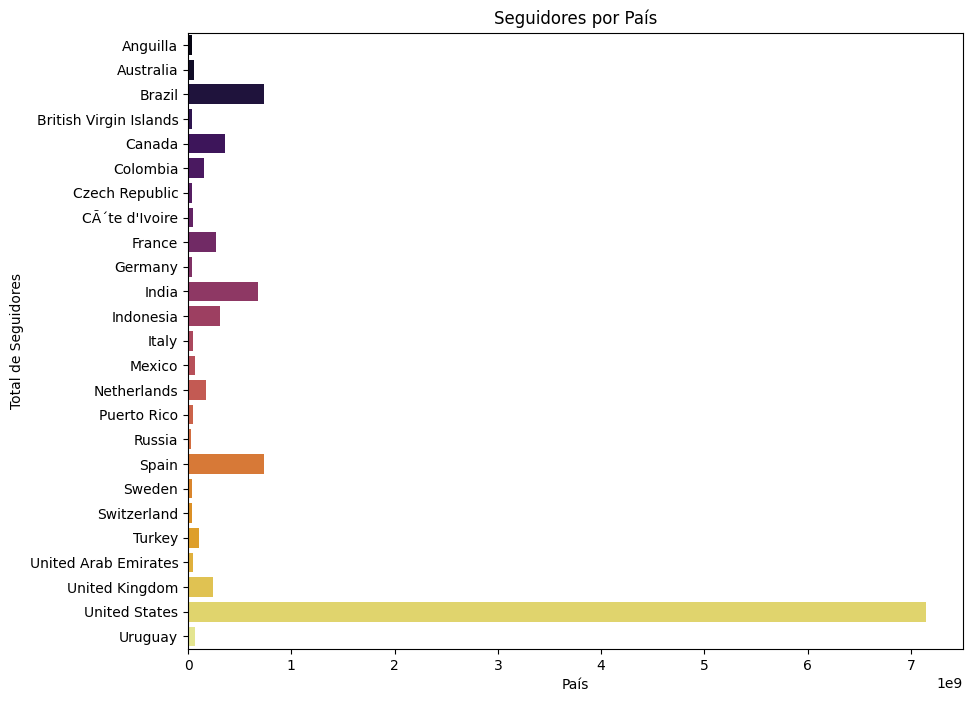

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(y='pais', x='seguidores', data=seguidores_pais, palette='inferno')
plt.title('Seguidores por País')
plt.xlabel('País')
plt.ylabel('Total de Seguidores')
plt.show()

In [ ]:
curtida_pais = data.groupby('pais')['media_curtidas'].sum().reset_index()

<ipython-input-238-272d4113db36>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='pais', x='media_curtidas', data=curtida_pais, palette='inferno')


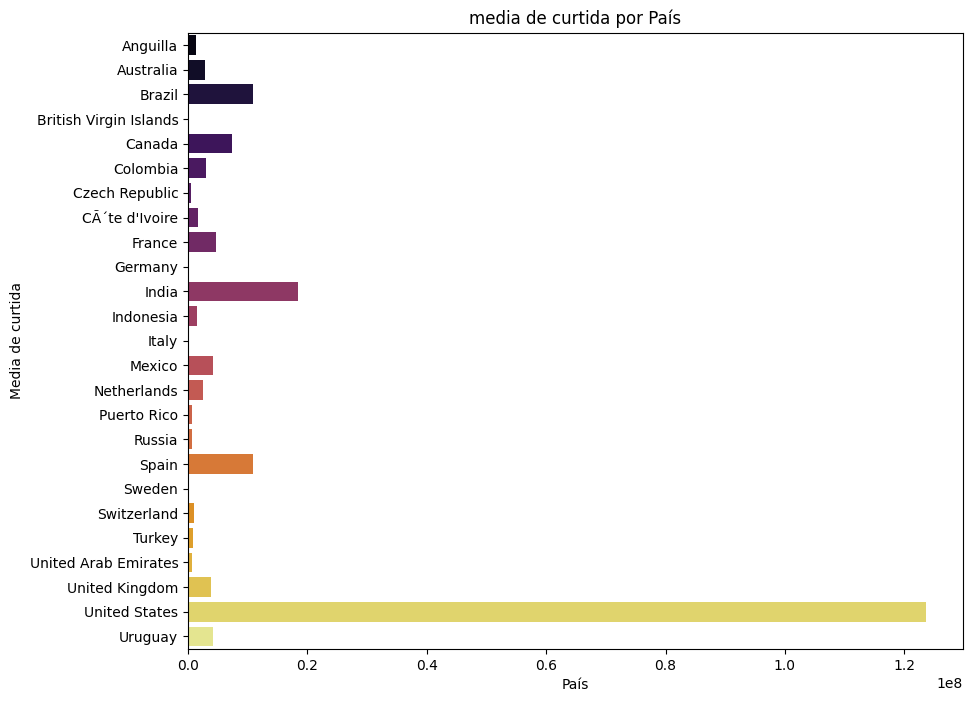

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(y='pais', x='media_curtidas', data=curtida_pais, palette='inferno')
plt.title('media de curtida por País')
plt.xlabel('País')
plt.ylabel('Media de curtida')
plt.show()

In [ ]:
data['engajamento_seguidor'] = data['curtidas_por_post'] / data['seguidores']

In [ ]:
data.head(30)

,classificacao,user,ponto_de_influencia,posts,seguidores,media_curtidas,eng_60_dias,curtidas_por_post,total_curtidas,pais,continente,engajamento_seguidor
0,1,cristiano,92,3300.0,475800000.0,8700000.0,1.39,6500000.0,29000000000,Spain,Europe,0.013661
1,2,kyliejenner,91,6900.0,366200000.0,8300000.0,1.62,5900000.0,57400000000,United States,North America,0.016111
2,3,leomessi,90,890.0,357300000.0,6800000.0,1.24,4400000.0,6000000000,NaN,NaN,0.012315
3,4,selenagomez,93,1800.0,342700000.0,6200000.0,0.97,3300000.0,11500000000,United States,North America,0.009629
4,5,therock,91,6800.0,334100000.0,1900000.0,0.20,665300.0,12500000000,United States,North America,0.001991
5,6,kimkardashian,91,5600.0,329200000.0,3500000.0,0.88,2900000.0,19900000000,United States,North America,0.008809
6,7,arianagrande,92,5000.0,327700000.0,3700000.0,1.20,3900000.0,18400000000,United States,North America,0.011901
7,8,beyonce,92,2000.0,272800000.0,3600000.0,0.76,2000000.0,7400000000,United States,North America,0.007331
8,9,khloekardashian,89,4100.0,268300000.0,2400000.0,0.35,926900.0,9800000000,United States,North America,0.003455
9,10,justinbieber,91,7400.0,254500000.0,1900000.0,0.59,1500000.0,13900000000,Canada,North America,0.005894


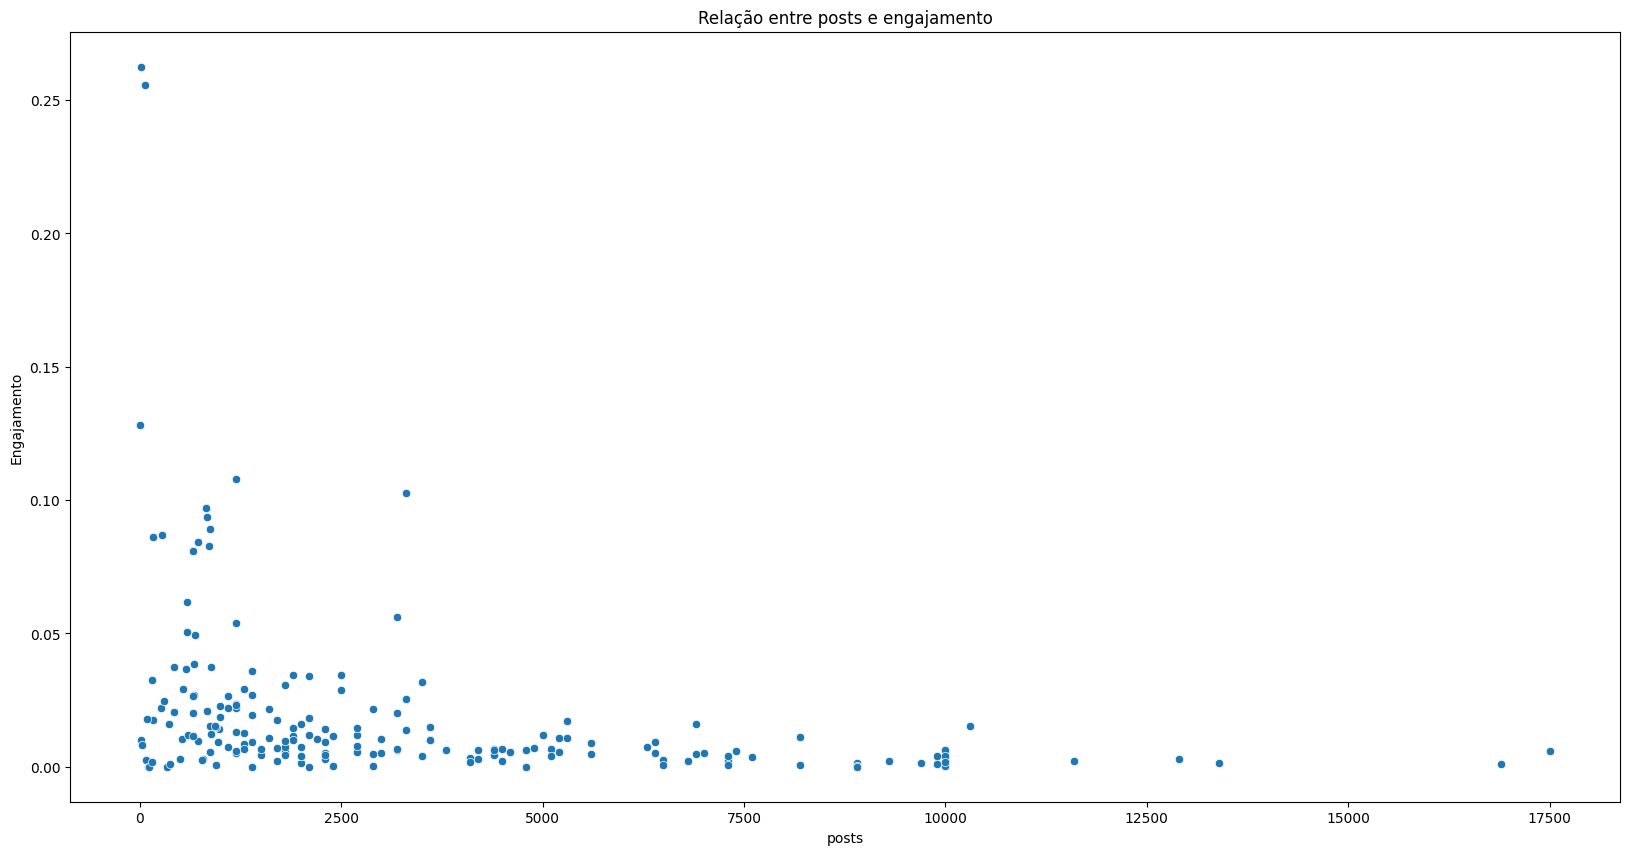

In [ ]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x='posts', y='engajamento_seguidor', data=data)
plt.title('Relação entre posts e engajamento')
plt.xlabel('posts')
plt.ylabel('Engajamento')
plt.show()

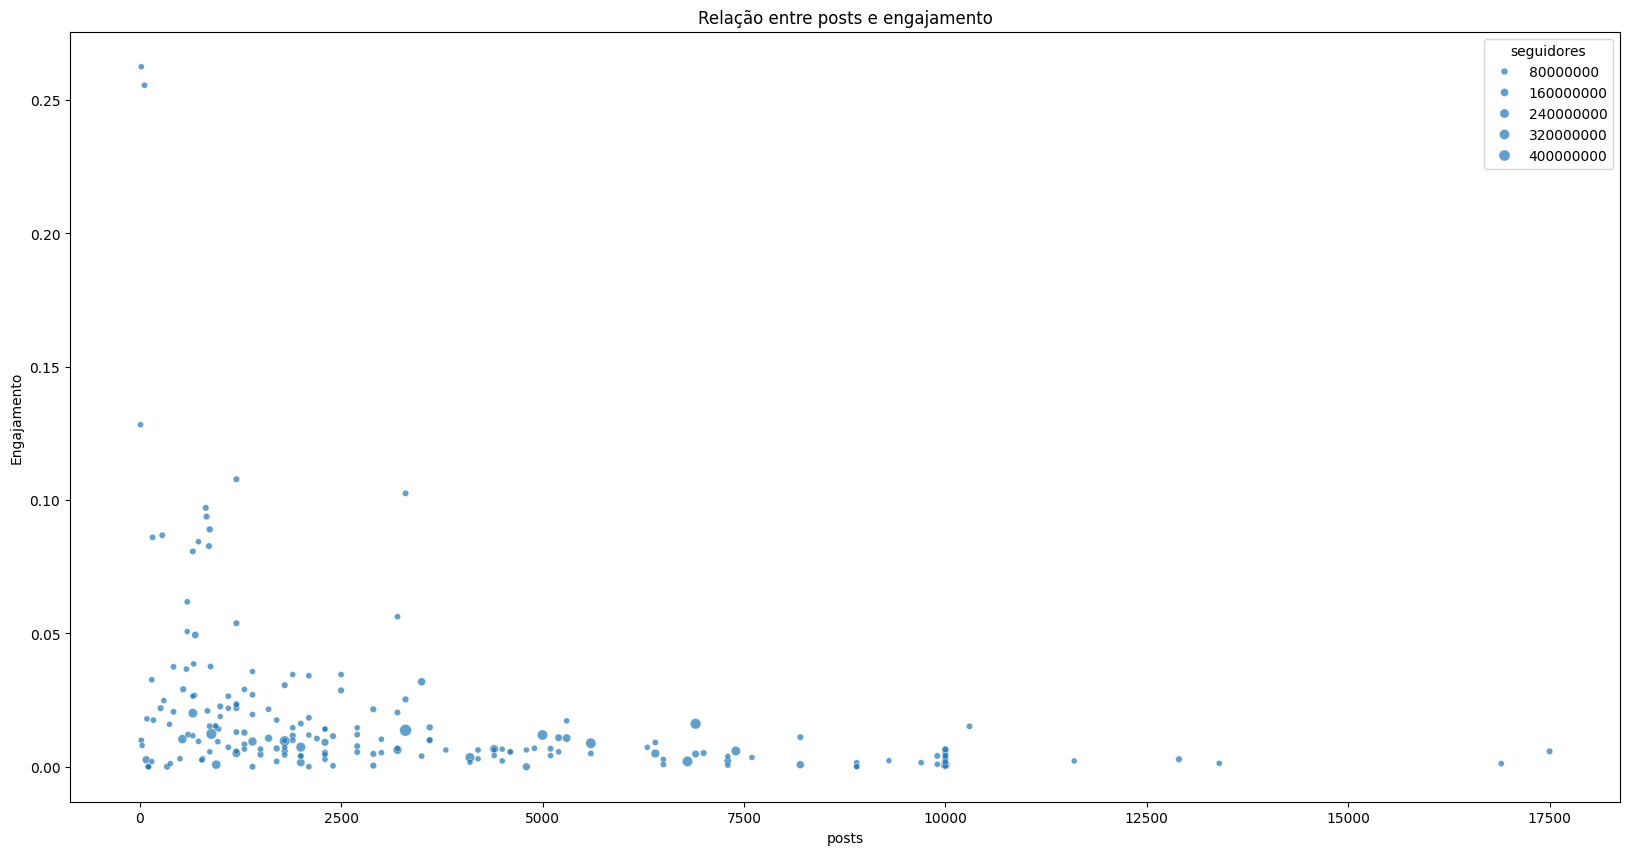

In [ ]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x='posts', y='engajamento_seguidor', data=data, size='seguidores', alpha=0.7)
plt.title('Relação entre posts e engajamento')
plt.xlabel('posts')
plt.ylabel('Engajamento')
plt.show()

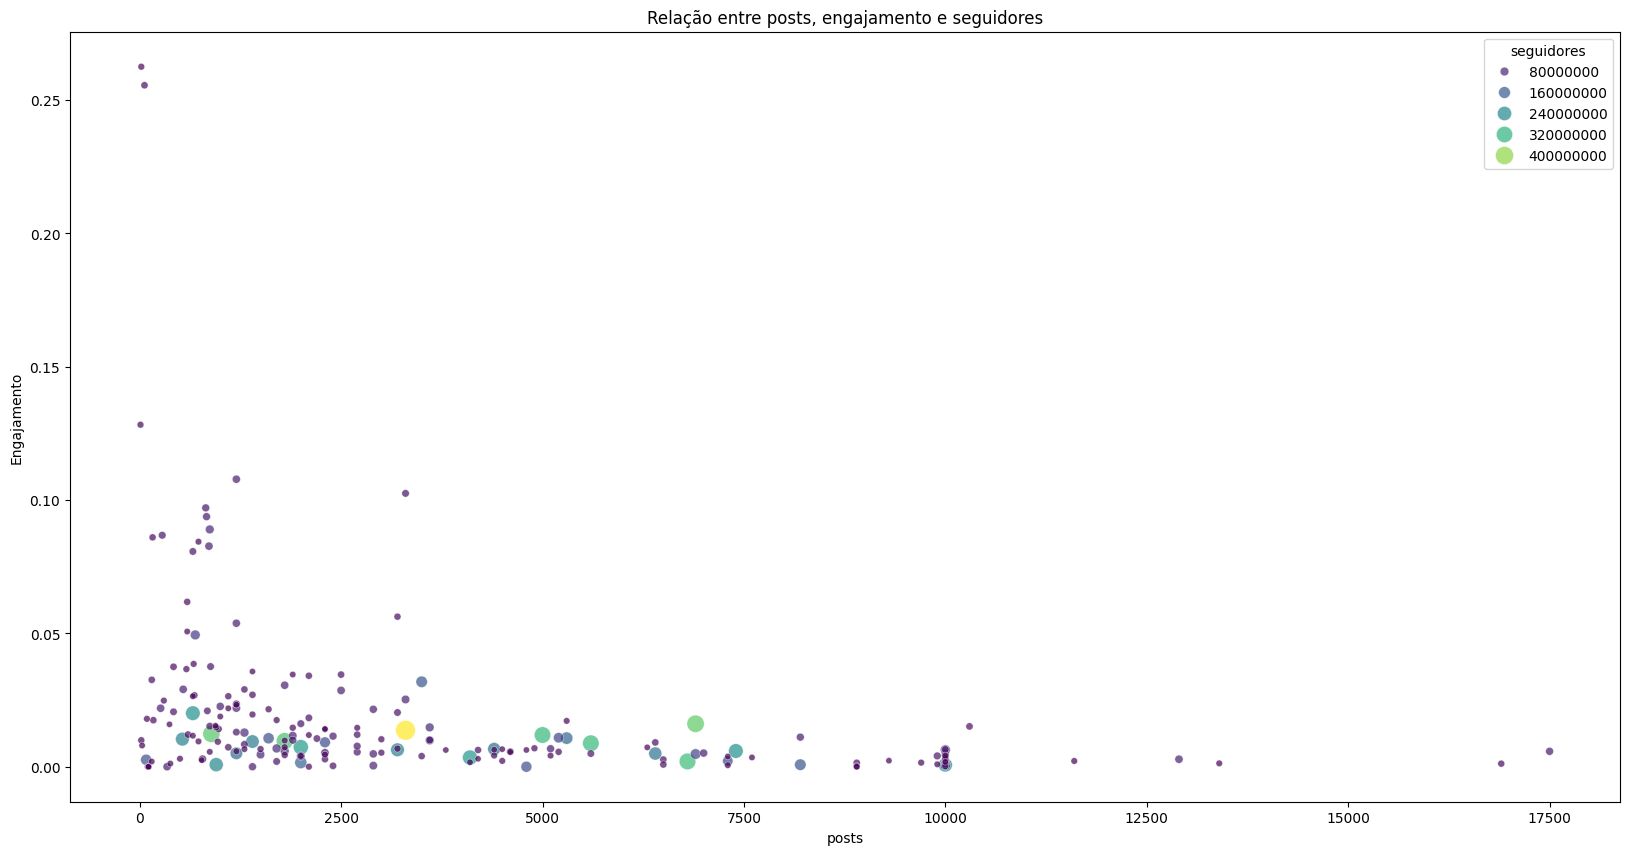

In [ ]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x='posts', y='engajamento_seguidor', hue='seguidores', data=data, size='seguidores', sizes=(20, 200), alpha=0.7, palette='viridis')
plt.title('Relação entre posts, engajamento e seguidores')
plt.xlabel('posts')
plt.ylabel('Engajamento')
plt.show()

In [ ]:
data_ordenada = data.sort_values(by=['engajamento_seguidor'], ascending=False)
data_ordenada.head(10)

,classificacao,user,ponto_de_influencia,posts,seguidores,media_curtidas,eng_60_dias,curtidas_por_post,total_curtidas,pais,continente,engajamento_seguidor
140,141,j.m,83,20.0,41900000.0,14200000.0,26.41,11000000.0,368100000,NaN,NaN,0.262530
102,103,thv,83,60.0,49300000.0,15400000.0,25.80,12600000.0,987400000,NaN,NaN,0.255578
138,139,badbunnypr,83,10.0,42100000.0,3700000.0,13.09,5400000.0,67500000,NaN,NaN,0.128266
53,54,tomholland2013,77,1200.0,67700000.0,5400000.0,10.83,7300000.0,6600000000,NaN,NaN,0.107829
78,79,karolg,83,3300.0,55600000.0,3100000.0,10.25,5700000.0,10100000000,India,Asia,0.102518
69,70,roses_are_rosie,82,820.0,61800000.0,4600000.0,9.72,6000000.0,3800000000,NaN,NaN,0.097087
64,65,sooyaaa__,82,830.0,62900000.0,4500000.0,9.43,5900000.0,3800000000,NaN,NaN,0.093800
38,39,lalalalisa_m,70,870.0,80900000.0,5800000.0,9.00,7200000.0,5100000000,NaN,NaN,0.088999
75,76,milliebobbybrown,80,280.0,57600000.0,4000000.0,8.63,5000000.0,1100000000,United States,North America,0.086806
118,119,zayn,82,160.0,46500000.0,4700000.0,8.81,4000000.0,773500000,United States,North America,0.086022


In [ ]:
data.head(10)

,classificacao,user,ponto_de_influencia,posts,seguidores,media_curtidas,eng_60_dias,curtidas_por_post,total_curtidas,pais,continente,engajamento_seguidor
0,1,cristiano,92,3300.0,475800000.0,8700000.0,1.39,6500000.0,29000000000,Spain,Europe,0.013661
1,2,kyliejenner,91,6900.0,366200000.0,8300000.0,1.62,5900000.0,57400000000,United States,North America,0.016111
2,3,leomessi,90,890.0,357300000.0,6800000.0,1.24,4400000.0,6000000000,NaN,NaN,0.012315
3,4,selenagomez,93,1800.0,342700000.0,6200000.0,0.97,3300000.0,11500000000,United States,North America,0.009629
4,5,therock,91,6800.0,334100000.0,1900000.0,0.20,665300.0,12500000000,United States,North America,0.001991
5,6,kimkardashian,91,5600.0,329200000.0,3500000.0,0.88,2900000.0,19900000000,United States,North America,0.008809
6,7,arianagrande,92,5000.0,327700000.0,3700000.0,1.20,3900000.0,18400000000,United States,North America,0.011901
7,8,beyonce,92,2000.0,272800000.0,3600000.0,0.76,2000000.0,7400000000,United States,North America,0.007331
8,9,khloekardashian,89,4100.0,268300000.0,2400000.0,0.35,926900.0,9800000000,United States,North America,0.003455
9,10,justinbieber,91,7400.0,254500000.0,1900000.0,0.59,1500000.0,13900000000,Canada,North America,0.005894


In [ ]:
data.tail(30)

,classificacao,user,ponto_de_influencia,posts,seguidores,media_curtidas,eng_60_dias,curtidas_por_post,total_curtidas,pais,continente,engajamento_seguidor
170,171,gisel_la,85,9900.0,36500000.0,150500.0,0.10,33400.0,1500000000,NaN,NaN,0.000915
171,172,eminem,84,660.0,36400000.0,1100000.0,2.69,962700.0,730100000,United States,North America,0.026448
172,173,mercedesbenz,77,10000.0,36000000.0,197900.0,0.18,64600.0,2000000000,British Virgin Islands,North America,0.001794
173,174,colesprouse,81,1200.0,35900000.0,2200000.0,2.34,834500.0,2600000000,NaN,NaN,0.023245
174,175,nattinatasha,47,30.0,35900000.0,518100.0,0.80,285900.0,18700000,Czech Republic,Europe,0.007964
175,176,shahidkapoor,82,1100.0,35600000.0,1300000.0,2.54,780000.0,1500000000,NaN,NaN,0.021910
176,177,tigerjackieshroff,83,2100.0,35600000.0,1100000.0,1.20,422900.0,2200000000,India,Asia,0.011879
177,178,kimberly.loaiza,78,590.0,35500000.0,2600000.0,5.23,1800000.0,1600000000,Mexico,North America,0.050704
178,179,barackobama,81,660.0,35400000.0,1100000.0,1.19,411500.0,739500000,United States,North America,0.011624
179,180,sachintendulkar,76,1000.0,35300000.0,800400.0,2.03,664500.0,810000000,NaN,NaN,0.018824


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   classificacao         200 non-null    int64  
 1   user                  200 non-null    object 
 2   ponto_de_influencia   200 non-null    int64  
 3   posts                 200 non-null    float64
 4   seguidores            200 non-null    float64
 5   media_curtidas        200 non-null    float64
 6   eng_60_dias           199 non-null    float64
 7   curtidas_por_post     200 non-null    float64
 8   total_curtidas        200 non-null    int64  
 9   pais                  138 non-null    object 
 10  continente            137 non-null    object 
 11  engajamento_seguidor  200 non-null    float64
dtypes: float64(6), int64(3), object(3)
memory usage: 18.9+ KB


#*Treinamento Modelo*

Processamento e limpeza dos dados

Treinamento e Teste do Modelo

In [ ]:
modelo_lasso = Lasso(alpha=0.1)
modelo_lasso.fit(X_train, y_train)


variaveis_importantes = X.columns[modelo_lasso.coef_ != 0]
print("Variáveis selecionadas pelo Lasso:", list(variaveis_importantes))


Variáveis selecionadas pelo Lasso: ['seguidores', 'posts']


In [ ]:
X = data[['seguidores', 'posts']]
y = data['engajamento_seguidor']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
modelo = LinearRegression()

modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Erro Quadrático Médio (MSE):", mse)
print("Coeficiente de Determinação (R²):", r2)
print("Coeficientes:", modelo.coef_)
print("Intercepto:", modelo.intercept_)


Erro Quadrático Médio (MSE): 0.0005506305762794782
Coeficiente de Determinação (R²): 0.12806249853963314
Coeficientes: [-3.42570409e-11 -3.03745091e-06]
Intercepto: 0.03181429522767328


Normalização dos Dados

In [ ]:
scaler = StandardScaler()
X_train_normalizado = scaler.fit_transform(X_train)
X_test_normalizado = scaler.transform(X_test)

modelo.fit(X_train_normalizado, y_train)
y_pred_normalizado = modelo.predict(X_test_normalizado)

mse_normalizado = mean_squared_error(y_test, y_pred_normalizado)
r2_normalizado = r2_score(y_test, y_pred_normalizado)

print("MSE com dados normalizados:", mse_normalizado)
print("R² com dados normalizados:", r2_normalizado)


MSE com dados normalizados: 0.0005506305762794782
R² com dados normalizados: 0.12806249853963314


Engenharia de Atributos

In [ ]:
data['seguidores_posts'] = data['seguidores'] * data['posts']

X = data[['seguidores', 'posts', 'seguidores_posts']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

mse_novo = mean_squared_error(y_test, y_pred)
r2_novo = r2_score(y_test, y_pred)

print("MSE com novo recurso:", mse_novo)
print("R² com novo recurso:", r2_novo)


MSE com novo recurso: 0.0005504688053833728
R² com novo recurso: 0.12831866686198146


In [ ]:
data[['user', 'seguidores_posts', 'engajamento_seguidor']]

,user,seguidores_posts,engajamento_seguidor
0,cristiano,1.570140e+12,0.013661
1,kyliejenner,2.526780e+12,0.016111
2,leomessi,3.179970e+11,0.012315
3,selenagomez,6.168600e+11,0.009629
4,therock,2.271880e+12,0.001991
...,...,...,...
195,iambeckyg,7.636000e+10,0.013997
196,nancyajram,1.261600e+11,0.006265
197,luansantana,2.556400e+10,0.002488
198,nickjonas,7.590000e+10,0.014173


#Avaliando o Modelo

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Erro Quadrático Médio (MSE):", mse)
print("Erro Absoluto Médio (MAE):", mae)
print("Coeficiente de Determinação (R²):", r2)


Erro Quadrático Médio (MSE): 0.0005504688053833728
Erro Absoluto Médio (MAE): 0.015398993639253797
Coeficiente de Determinação (R²): 0.12831866686198146


In [ ]:
print("Coeficientes:", modelo.coef_)
print("Intercepto:", modelo.intercept_)

for var, coef in zip(X.columns, modelo.coef_):
    print(f"Impacto de {var}: {coef:.4f}")

Coeficientes: [-7.85211524e-11 -3.81730389e-06  1.15003620e-14]
Intercepto: 0.03471485356441668
Impacto de seguidores: -0.0000
Impacto de posts: -0.0000
Impacto de seguidores_posts: 0.0000


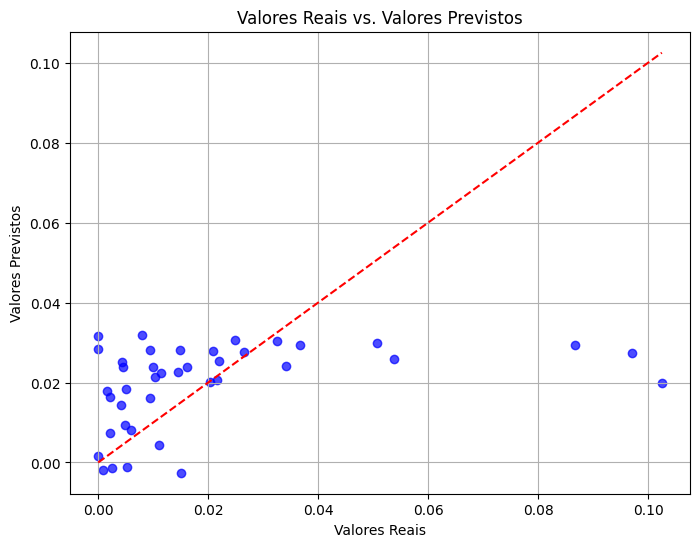

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Valores Reais vs. Valores Previstos")
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.grid()
plt.show()


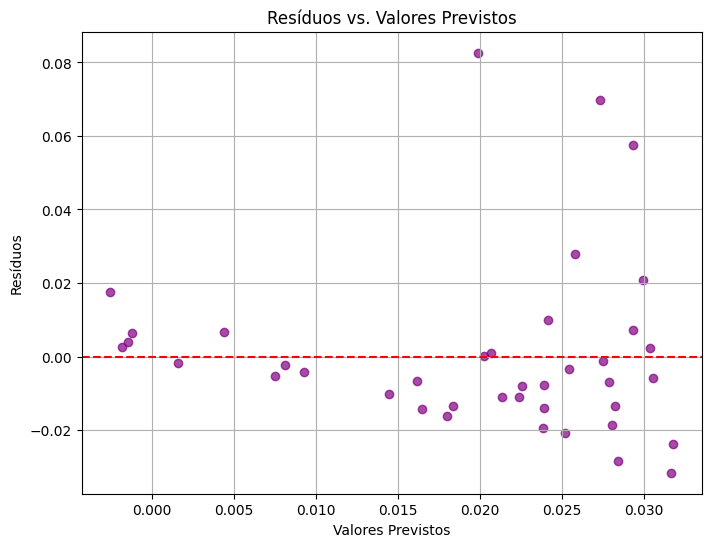

In [ ]:
residuos = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuos, alpha=0.7, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.title("Resíduos vs. Valores Previstos")
plt.xlabel("Valores Previstos")
plt.ylabel("Resíduos")
plt.grid()
plt.show()


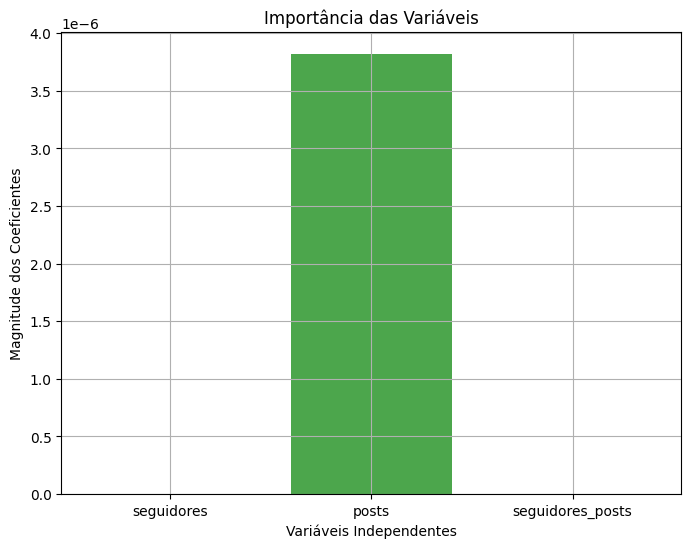

In [ ]:
importancia_variaveis = np.abs(modelo.coef_)
plt.figure(figsize=(8, 6))
plt.bar(X.columns, importancia_variaveis, color='green', alpha=0.7)
plt.title("Importância das Variáveis")
plt.xlabel("Variáveis Independentes")
plt.ylabel("Magnitude dos Coeficientes")
plt.grid()
plt.show()


In [ ]:
X = data[['engajamento_seguidor', 'posts', 'seguidores']]
coeficientes = np.abs(modelo.coef_)
importancia = sorted(zip(X.columns, coeficientes), key=lambda x: x[1], reverse=True)
print("Importância das variáveis:")
for var, imp in importancia:
    print(f"{var}: {imp:.1f}")


Importância das variáveis:
posts: 0.0
engajamento_seguidor: 0.0
seguidores: 0.0


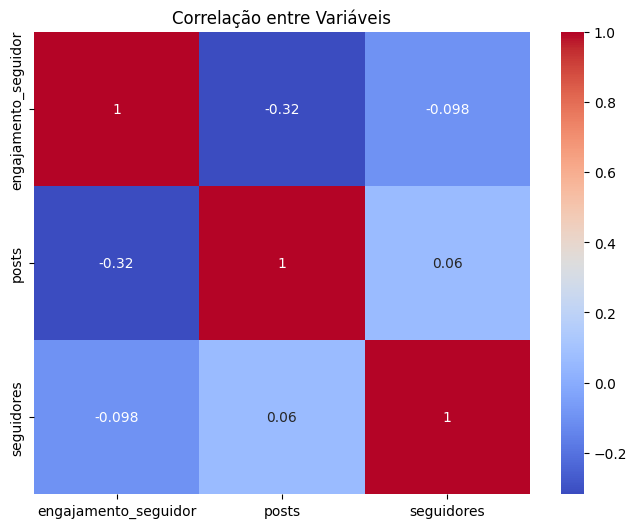

In [ ]:
correlacoes = X.corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlacoes, annot=True, cmap="coolwarm")
plt.title("Correlação entre Variáveis")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor

modelo_rf = RandomForestRegressor(random_state=42)
modelo_rf.fit(X_train, y_train)

importancia_rf = modelo_rf.feature_importances_

importancia_variaveis = sorted(zip(X.columns, importancia_rf), key=lambda x: x[1], reverse=True)
print("Importância das variáveis (Random Forest):")
for var, imp in importancia_variaveis:
    print(f"{var}: {imp:.4f}")


Importância das variáveis (Random Forest):
seguidores: 0.4524
posts: 0.3783
engajamento_seguidor: 0.1693


#Validação Cruzada

In [ ]:
modelo = LinearRegression()

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

scores = cross_val_score(modelo, X, y, cv=5, scoring=mse_scorer)

print("MSE por Fold:", -scores)
print("Média do MSE:", -scores.mean())
print("Desvio Padrão do MSE:", scores.std())

MSE por Fold: [4.71460579e-33 1.89604945e-34 8.84710109e-35 4.33410203e-34
 5.46539404e-35]
Média do MSE: 1.0961491774677799e-33
Desvio Padrão do MSE: 1.8140783474082665e-33


In [ ]:
r2_scores = cross_val_score(modelo, X, y, cv=5, scoring='r2')
print("R² por Fold:", r2_scores)
print("Média do R²:", r2_scores.mean())
print("Desvio Padrão do R²:", r2_scores.std())

mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
mae_scores = cross_val_score(modelo, X, y, cv=5, scoring=mae_scorer)
print("MAE por Fold:", -mae_scores)
print("Média do MAE:", -mae_scores.mean())
print("Desvio Padrão do MAE:", mae_scores.std())

R² por Fold: [1. 1. 1. 1. 1.]
Média do R²: 1.0
Desvio Padrão do R²: 0.0
MAE por Fold: [5.75186923e-17 8.46519036e-18 4.37340051e-18 8.29191353e-18
 6.29302369e-18]
Média do MAE: 1.6988444079402207e-17
Desvio Padrão do MAE: 2.0319979626649757e-17


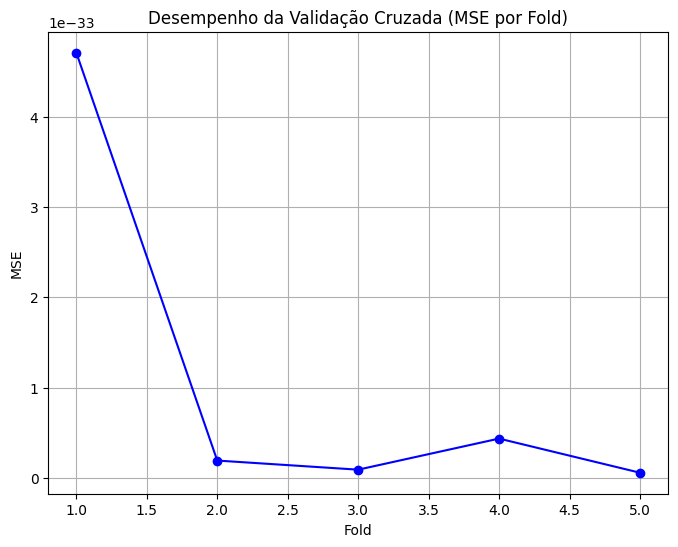

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(scores) + 1), -scores, marker='o', linestyle='-', color='blue')
plt.title("Desempenho da Validação Cruzada (MSE por Fold)")
plt.xlabel("Fold")
plt.ylabel("MSE")
plt.grid()
plt.show()